In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
!pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [4]:
!pip install tensorflow

  Using cached importlib_metadata-4.8.2-py3-none-any.whl (17 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=fe2d9debd47432a56e4375b7d57feb7c9c838d3d0e41355b4be1ee457278135b
  Stored in directory: c:\users\prateek.dasgupta\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow .keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [7]:
fake = pd.read_csv('data/Fake.csv')
true = pd.read_csv('data/True.csv')

In [8]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot:xlabel='subject', ylabel='count'>

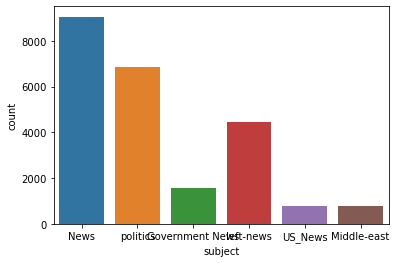

In [11]:
sns.countplot(x = 'subject', data = fake)

In [12]:
text_fake = ' '.join(fake['text'].tolist())
text_true = ' '.join(true['text'].tolist())

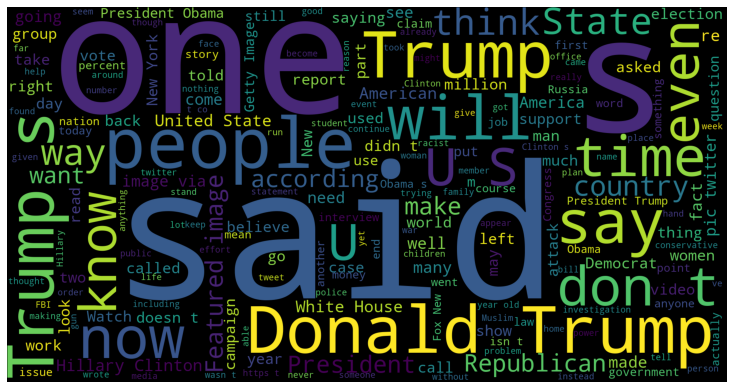

In [13]:
wordcloud = WordCloud(width = 1920, height = 1000).generate(text_fake)
fig = plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

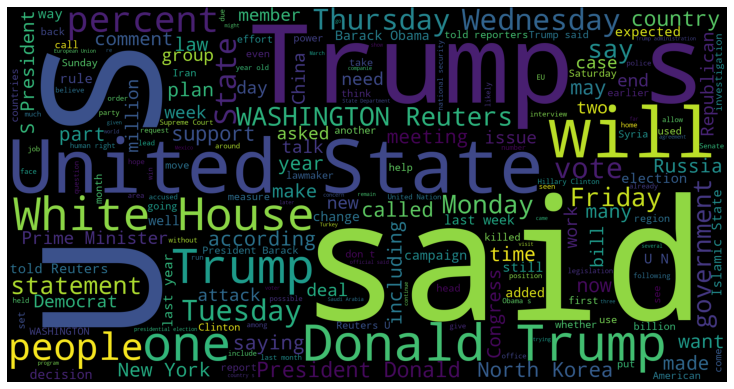

In [14]:
wordcloud = WordCloud(width = 1920, height = 1000).generate(text_true)
fig = plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [15]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [16]:
unknown_publishers = []

for index, row in enumerate(true['text'].values):
    try:
        record = row.split('-', maxsplit = 1) 
        record[1]
        
        assert(len(record[0])<120)
        
    except:
        unknown_publishers.append(index)

In [17]:
len(unknown_publishers)

222

In [18]:
publisher = []
temp_text = []

for index, row in enumerate(true.text.values):
    if index in unknown_publishers:
        temp_text.append(row)
        publisher.append('Unknown')
        
    else:
        record = row.split('-', maxsplit = 1)
        publisher.append(record[0].strip())
        temp_text.append(record[1].strip())

In [19]:
true['publisher'] = publisher
true['text'] = temp_text

In [20]:
true.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [21]:
true.shape

(21417, 5)

In [22]:
empty_fake_index = [index for index, text in enumerate(fake['text'].tolist()) if str(text.strip()) == ""]

In [23]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [24]:
true['text'] = true['text'] + " " + true['title']
true['text'] = true['text'].apply(lambda x: str(x).lower())

In [25]:
fake['text'] = fake['text'] + " " + fake['title']
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# Preprocessing text

In [26]:
true['class'] = 1
fake['class'] = 0

In [27]:
true = true[['text', 'class']]
fake = fake[['text', 'class']]

In [28]:
data = true.append(fake, ignore_index = True)

In [29]:
import re

In [30]:
def remove_special_characters(line):
    line = re.sub("[^a-zA-Z0-9\s]","", line)
    line = re.sub(' +', ' ', line)
    
    return line

In [31]:
data['text'] = data['text'].apply(remove_special_characters)

## Vectorization

In [33]:
import gensim

In [34]:
y = data['class'].values

In [35]:
X = [d.split() for d in data['text'].tolist()]

In [36]:
#Dimension of vectors we are generating
DIM = 100

#Creating Word Vectors by Word2Vec Method
w2v_model = gensim.models.Word2Vec(sentences = X, vector_size = DIM, window = 10, min_count = 1)

In [37]:
# We have now represented each of 230799 words by a 100 dim vector.
len(w2v_model.wv)

230799

In [38]:
#see a sample vector for random word, lets say love
w2v_model.wv["love"]

array([ 5.0889983 ,  0.6665147 , -0.25094274, -2.5738866 , -1.0708725 ,
        0.13946153,  0.48476005,  1.5545148 , -2.1557093 ,  0.05139907,
       -0.7957409 , -1.6201494 , -3.4087775 , -0.57254755,  0.7043016 ,
       -2.7370334 , -1.3836995 ,  0.8605729 ,  2.6888185 , -0.98276716,
       -1.1253545 ,  1.5089326 , -2.1923513 ,  2.4551685 , -3.7912474 ,
        3.0923688 ,  1.6428106 , -3.751351  , -1.6464041 , -2.957427  ,
        0.73647815,  0.05387806, -1.3421729 ,  1.2461373 , -0.77422327,
        2.8907611 ,  1.002454  , -3.9605887 , -0.14236288, -3.5763822 ,
        0.53673697, -4.976576  , -3.3724036 , -1.142441  , -2.4704566 ,
       -0.3863191 ,  1.371126  , -2.0802224 , -2.5348408 ,  1.905947  ,
        1.1248554 ,  3.3011377 ,  2.21542   , -2.5811284 ,  0.58713675,
       -0.29200968, -2.6252148 ,  0.5732346 , -0.77210385, -1.6861082 ,
       -1.3379729 , -1.4086405 , -0.79296625, -2.8751824 ,  2.4170787 ,
        0.7283623 ,  3.3865957 ,  3.2164068 ,  0.36426327,  2.45

In [39]:
#Feeding US Presidents
w2v_model.wv.most_similar(positive=["trump","obama", "clinton"])

[('clintons', 0.5731078386306763),
 ('trumps', 0.5690658688545227),
 ('bush', 0.5677967071533203),
 ('obamas', 0.5533705353736877),
 ('obamalevin', 0.530454158782959),
 ('macron', 0.4968690276145935),
 ('obamathe', 0.4887189567089081),
 ('clintonthe', 0.48283693194389343),
 ('he', 0.47681090235710144),
 ('factsfeatured', 0.47334739565849304)]

These Vectors will be passed to LSTM instead of words. 1D-CNN can further be used to extract features from the vectors.

Keras has implementation called "Embedding Layer" which would create word embeddings(vectors). Since we did that with gensim's word2vec, we will load these vectors into embedding layer and make the layer non-trainable.

We cannot pass string words to embedding layer, thus need some way to represent each words by numbers.

Tokenizer can represent each word by number

In [40]:
# Tokenizing Text -> Repsesenting each word by a number
# Mapping of orginal word to number is preserved in word_index property of tokenizer

#Tokenized applies basic processing like changing it to lower case, explicitely setting that as False

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [41]:
# lets check the first 10 words of first news
#every word has been represented with a number
X[0][:10]

[1, 419, 3, 4, 301, 79, 6312, 6, 1, 30]

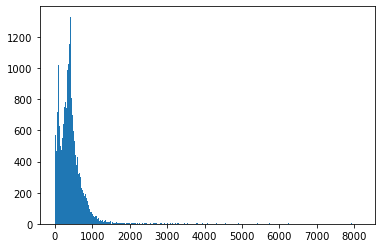

In [42]:
plt.hist([len(x) for x in X], bins = 700) # Plotting a histogram of the number of words in each row
plt.show()

In [43]:
#Lets check few word to numerical reprsentation
#Mapping is preserved in dictionary -> word_index property of instance
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break   

the -> 1
to -> 2
of -> 3
a -> 4
and -> 5
in -> 6
that -> 7
on -> 8
for -> 9
s -> 10


In [44]:
len(X)

44898

In [45]:
## Out of 44k news, 43k have less than 1000 words
nos = np.array([len(x) for x in X])
len(nos[nos<1000])

43302

In [46]:
# Keeping all news to 1000, then adding padding to news with less than 1000 words and truncating the news with more than 1000 words
maxlen = 1000

# Making all news of size 1000
X = pad_sequences(X, maxlen = maxlen)

In [47]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1

vocab_size = len(tokenizer.word_index) + 1 # Adding a one for the unknown words

In [68]:
X.shape

(44898, 1000)

In [48]:
vocab_size

230800

In [49]:
vocab = tokenizer.word_index

In [50]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model):
    
    # total vocabulary size plus 1 for unknown words
    weight_matrix = np.zeros((vocab_size, DIM))
    
    for word, i in vocab.items():
        weight_matrix[i] = model.wv[word]
        
    return weight_matrix

In [51]:
embedding_vectors = get_weight_matrix(w2v_model)

We Create a matrix of mapping between word-index and vectors. We use this as weights in embedding layer

Embedding layer accepts numecical-token of word and outputs corresponding vector to inner layer.

It sends vector of zeros to next layer for unknown words which would be tokenized to 0.

Input length of Embedding Layer is the length of each news (1000 now due to padding and truncating)

In [52]:
# embedding_vectors is the Weight matrix for all the words in the dataset
len(embedding_vectors)

230800

In [54]:
# Defining Neural Network
model = Sequential()

# Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim = DIM, weights = [embedding_vectors], input_length = maxlen, trainable = False))

In [55]:
# LSTM 
model.add(LSTM(units = 128))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23080000  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,197,377
Trainable params: 117,377
Non-trainable params: 23,080,000
_________________________________________________________________


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [58]:
model.fit(X_train, y_train, epochs = 6, validation_split = 0.3)

Epoch 1/6
737/737 [==============================] - 798s 1s/step - loss: 0.0894 - acc: 0.9666 - val_loss: 0.0477 - val_acc: 0.9839
Epoch 2/6
737/737 [==============================] - 837s 1s/step - loss: 0.0285 - acc: 0.9914 - val_loss: 0.0337 - val_acc: 0.9891
Epoch 3/6
737/737 [==============================] - 772s 1s/step - loss: 0.0129 - acc: 0.9956 - val_loss: 0.0370 - val_acc: 0.9891
Epoch 4/6
737/737 [==============================] - 719s 976ms/step - loss: 0.0083 - acc: 0.9972 - val_loss: 0.0348 - val_acc: 0.9891
Epoch 5/6
737/737 [==============================] - 770s 1s/step - loss: 0.0039 - acc: 0.9991 - val_loss: 0.0354 - val_acc: 0.9909
Epoch 6/6
737/737 [==============================] - 847s 1s/step - loss: 0.0061 - acc: 0.9979 - val_loss: 0.0392 - val_acc: 0.9900


In [75]:
X_test.shape

(11225, 1000)

In [60]:
accuracy_score(y_test, y_pred)

0.9888641425389755

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5818
           1       0.99      0.99      0.99      5407

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [64]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

In [104]:
# Testing the model with some fake news
x = ['This is some news']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
probability = model.predict(x)
print('True news' if (model.predict(x) >= 0.5).astype(int) == 1 else 'Fake news')

Fake news


In [105]:
# Testing the model with a real news
x = ['In the latest "disclosure", Maharashtra minister Nawab Malik on Monday claimed that the sister-in-law of Narcotics Control Bureau zonal director, Sameer Wankhede, has a pending drug case against her in the Pune court.']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen = maxlen)
print('True news' if (model.predict(x) >= 0.5).astype(int) == 1 else 'False news')

True news
